In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
data = pd.read_csv('E:/CV and Cover Letter/Data Analyst job/python challenges/Movie budget and profits/cost_revenue_dirty.csv')

In [19]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [20]:
data.shape

(5391, 6)

In [21]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [23]:
data.duplicated().sum()

0

In [24]:
#COnverting amount of dollar to integer/numeric
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$','').str.replace(',','')
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Production_Budget.dtype

C:\Users\sophia\AppData\Local\Temp\ipykernel_34324\3206934173.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$','').str.replace(',','')


dtype('int64')

In [25]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$','').str.replace(',','')
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.USD_Worldwide_Gross.dtype

C:\Users\sophia\AppData\Local\Temp\ipykernel_34324\2693271491.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$','').str.replace(',','')


dtype('int64')

In [26]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$','').str.replace(',','')
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.USD_Domestic_Gross.dtype

C:\Users\sophia\AppData\Local\Temp\ipykernel_34324\3434484960.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$','').str.replace(',','')


dtype('int64')

### Convert date to datetime format

In [27]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [28]:
data.Release_Date.dtype

dtype('<M8[ns]')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


## Count the average of production budget of the films

In [30]:
production_budget_average = data.USD_Production_Budget.mean()
production_budget_average 

31113737.57837136

In [31]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [32]:
''''It's shown the total and the average production budget, avg worldwide gross revenue and avg of domestic gross
It's shown the lowest and the highest production films made
-The average film costs about 31m dollars to make and makes around 3x that (or ~89m dollars) in worldwide revenue. So that's encouraging.
-But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is 5 million dollars and they only bring in 3.8m dolllars in worldwide revenue!
-The minimum domestic and worldwide revenue is 0 dollar. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.
-On the other hand, the highest production budget was 425,000,000 dollars and the highest worldwide revenue was 2,783,918,982 dollars. 2.7 Billion dollars revenue!

SyntaxError: EOF while scanning triple-quoted string literal (1955490947.py, line 6)

In [33]:
#The lowest budget film
data.USD_Production_Budget.min()

1100

In [34]:
data.loc[data.USD_Production_Budget.idxmin()]

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object

In [35]:
data.loc[data.USD_Production_Budget.idxmin():data.USD_Production_Budget.idxmin()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [36]:
#The highest budget film
data.loc[data.USD_Production_Budget.idxmax():data.USD_Production_Budget.idxmax()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


## Investigating the Zero Revenue Films
## How many films domestically gross with 0 dollar?
## What are the highest budget films with 0 dolar?


In [37]:
data[data.USD_Domestic_Gross == 0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [38]:
data[data.USD_Domestic_Gross == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [39]:
data[data.USD_Domestic_Gross == 0].USD_Domestic_Gross.count()

512

In [40]:
print('There are',f' {data[data.USD_Domestic_Gross == 0].USD_Domestic_Gross.count()} films $0 gross domesticly')

There are  512 films $0 gross domesticly


In [41]:
#what are the highest budget films with $0 gross
data[data.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget', ascending = False).head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0


In [42]:
#How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [43]:
data[data.USD_Worldwide_Gross == 0].USD_Worldwide_Gross.count()

357

In [44]:
print(f'{data[data.USD_Worldwide_Gross == 0].USD_Worldwide_Gross.count()} films with $0 gross international')

357 films with $0 gross international


In [45]:
#Films that worldwide gross than domestic
data[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [46]:
worldwide_released = data[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
print('There are', f' {len(worldwide_released)} international movies released')

There are  155 international movies released


In [47]:
# Unreleased Films
# Identify which films were not released yet as of the time of data collection (May 1st, 2018).

In [48]:
date_of_collection = pd.Timestamp('2018-05-01')

In [49]:
films_not_released_yet = data[data.Release_Date > date_of_collection]
films_not_released_yet

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [50]:
# Number of films not released before date of collection
numbers_unreleased = len(films_not_released_yet)
numbers_unreleased

7

In [51]:
# How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
# Create another DataFrame called data_clean that does not include these films.


In [52]:
data_clean = data[data.Release_Date <= date_of_collection]

In [53]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


In [54]:
print(f' Number of films that have not yet had a chance to be screened in the box office : {len(data_clean)}' )

 Number of films that have not yet had a chance to be screened in the box office : 5384


In [55]:
# Films that Lost Money
# What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [56]:
films_lost_money = len(data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]) 
films_lost_money

2007

In [57]:
percentage_of_lost = (films_lost_money / len(data_clean))*100
percentage_of_lost 

37.27711738484398

In [58]:
print('The percentage of films with lost money is :', f'{ "{:.2f}".format(percentage_of_lost)}% percent')

The percentage of films with lost money is : 37.28% percent


In [59]:
#Converting Years to Decades

In [60]:
time_index = pd.DatetimeIndex(data_clean.Release_Date)
time_index

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)

In [61]:
release_year = time_index.year
release_year

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [62]:
decades = release_year //10*10
decades

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

In [63]:
# Adding new Decade column to dataframe
data_clean['Decade'] = decades
data_clean.head()

C:\Users\sophia\AppData\Local\Temp\ipykernel_34324\2089653626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = decades


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [64]:
#  Classfying films into two categories old and new films
'''old_films should include all the films before 1999 (up to and including 1999)
   new_films should include all the films from 2000 onwards
   How many films were released prior to 2000?
   What was the most expensive film made prior to 2000?

SyntaxError: EOF while scanning triple-quoted string literal (3062977178.py, line 5)

In [65]:
old_film = data_clean[data_clean.Decade < 1999]
new_film = data_clean[data_clean.Decade >= 2000]


In [66]:
print('There are :', f'{len(old_film)} movies produced before years 2000')

There are : 1373 movies produced before years 2000


In [67]:
 data_clean.loc[old_film.USD_Production_Budget.idxmax():old_film.USD_Production_Budget.idxmax()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,1990


In [68]:
#print(f'{old_films.loc[old_films.USD_Production_Budget.idxmax()].Movie_Title} was the most expensive film made prior to 1970 with ${old_films.USD_Production_Budget.max()}.')
print(f'{old_film.loc[old_film.USD_Production_Budget.idxmax()].Movie_Title} was the most expensive budget production movies prior to 2000')

Titanic was the most expensive budget production movies prior to 2000


In [69]:
# Relationship between the old films movie production budget and Worldwide Gross in Regression Plot

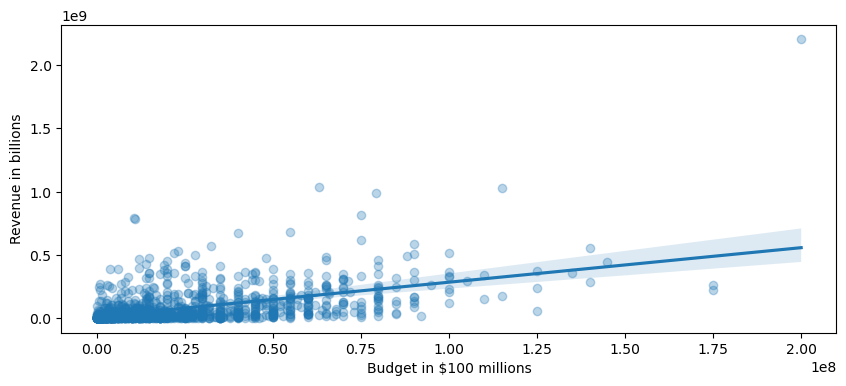

In [70]:
plt.figure(figsize = (10,4))
ax = sns.regplot( data = old_film, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross', scatter_kws={'alpha': 0.3})
ax.set(xlabel = 'Budget in $100 millions', ylabel = "Revenue in billions")

plt.show()

## Relationship between the new films movie production budget and Worldwide Gross in Regression Plot

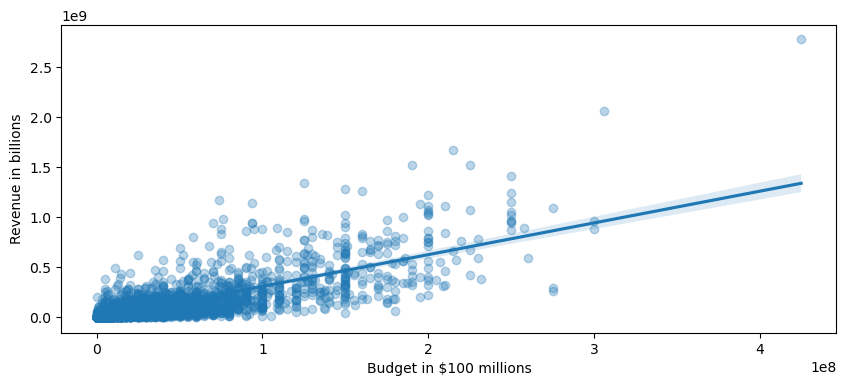

In [71]:
plt.figure(figsize = (10,4))
ax = sns.regplot( data = new_film, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross', scatter_kws={'alpha': 0.3})
ax.set(xlabel = 'Budget in $100 millions', ylabel = "Revenue in billions")

plt.show()

# Prediction and Statistics Evaluation

In [115]:
# Create Linear Regression model
model = LinearRegression()

In [116]:
##Sample Data##
# Features or variables (independent variable)
X = pd.DataFrame(new_film.USD_Production_Budget)
# Response of features(dependent variable)
y = pd.DataFrame(new_film.USD_Worldwide_Gross)


In [117]:
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [118]:
# Generate or fit the model
model.fit(X_train, y_train)

LinearRegression()

In [119]:
# Make predictions
y_predict = model.predict(X_test)
y_predict

array([[ 1.34496502e+08],
       [ 4.99572504e+07],
       [ 1.90856003e+08],
       [ 4.68261670e+07],
       [ 1.12578918e+08],
       [ 2.53477671e+08],
       [ 4.52606253e+07],
       [ 4.10031841e+08],
       [ 2.49085832e+07],
       [-9.22022577e+06],
       [ 1.75200586e+08],
       [ 7.18748342e+07],
       [ 4.36950836e+07],
       [ 1.75200586e+08],
       [-9.53333411e+06],
       [-1.21947550e+07],
       [ 3.11707500e+07],
       [ 9.69235013e+07],
       [-1.15685383e+07],
       [ 3.43018334e+07],
       [ 1.43889752e+08],
       [-7.96779241e+06],
       [ 3.94376424e+08],
       [ 6.56126674e+07],
       [ 4.99572504e+07],
       [-6.40225071e+06],
       [-6.40225071e+06],
       [-7.96779241e+06],
       [ 2.96052083e+07],
       [ 7.68762456e+06],
       [ 4.99572504e+07],
       [ 1.86464164e+07],
       [ 1.70808747e+07],
       [ 2.37822254e+08],
       [ 4.56998092e+08],
       [ 3.31754756e+08],
       [-8.90711743e+06],
       [ 8.12680843e+07],
       [-9.5

In [120]:
# Calculate Mean Square Error
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1.3818608447034094e+16


In [127]:
# Get the intercept
intercept = model.intercept_
print(" The intercept is: ", intercept)

 The intercept is:  [-12664417.50180592]


In [122]:
# Calculate the Coefficient
coefficient = model.coef_
print('The Coefficient is : ', coefficient)

The Coefficient is :  [[3.13108339]]


In [124]:
r2 = r2_score(y_test, y_predict)
print(f"R² Score: {r2}")

R² Score: 0.6177564627957006
